In [1]:
import os
import re
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [4]:
wikid = pd.read_parquet(os.path.join("data","wikidata.parquet"))

In [5]:
wikid.columns

Index(['024_a', 'ceny', 'druh_umrti', 'facebook', 'instagram',
       'jazykove_verze', 'label_cs', 'label_en', 'manzelstvo', 'obcanstvi',
       'partnerstvo', 'popis_cs', 'popis_en', 'potomstvo', 'pricina_umrti',
       'profese', 'role', 'skoly', 'sourozenectvo', 'strany', 'twitter',
       'udalosti', 'vezeni', 'w_gender', 'w_misto_narozeni', 'w_misto_umrti',
       'w_narozeni', 'w_narozeni_presne', 'w_umrti', 'w_umrti_presne', 'web',
       'wiki_cs', 'wiki_en'],
      dtype='object')

In [6]:
wikid = wikid.reset_index(drop=False).rename(columns={"index": "100_7"})

In [7]:
df = df.merge(pd.read_parquet(os.path.join('data','cnb_vyber.parquet')), left_index=True, right_index=True, how="left")

In [8]:
df = df.explode('100_7')

In [9]:
df = df.merge(wikid, left_on='100_7', right_on='100_7', how='left')

In [10]:
df = df[(df['w_umrti'] >= df['rok']) | (df['w_umrti'].isnull())]

In [11]:
df

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,ceny,druh_umrti,facebook,instagram,jazykove_verze,label_cs,label_en,manzelstvo,obcanstvi,partnerstvo,popis_cs,popis_en,potomstvo,pricina_umrti,profese,role,skoly,sourozenectvo,strany,twitter,udalosti,vezeni,w_gender,w_misto_narozeni,w_misto_umrti,w_narozeni,w_narozeni_presne,w_umrti,w_umrti_presne,web,wiki_cs,wiki_en
0,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47897,2025.0,Kouzelná třída dostává vysvědčení,Pospíšilová Zuzana,mzk2006331486,250121s2025 xr a b 000 j cze,[978-80-271-5462-3],"[Kč 229,00]",[(vázáno) :],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-32, 821-93, (0:82-32)]",[aut],mzk2006331486,"Pospíšilová, Zuzana,",1975-,None,Kouzelná třída dostává vysvědčení /,Zuzana Pospíšilová ; ilustroval Drahomír Trsťan,None,None,None,[Vydání 1.],None,None,None,None,None,None,None,[Praha :],"[Bambook,]",[2025],[1],[72 stran :],[barevné ilustrace ;],[22 cm],[Čtení pro prvňáčky],

In [12]:
df[df['100_a'].astype(str).str.contains('Poláček, Karel')]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,ceny,druh_umrti,facebook,instagram,jazykove_verze,label_cs,label_en,manzelstvo,obcanstvi,partnerstvo,popis_cs,popis_en,potomstvo,pricina_umrti,profese,role,skoly,sourozenectvo,strany,twitter,udalosti,vezeni,w_gender,w_misto_narozeni,w_misto_umrti,w_narozeni,w_narozeni_presne,w_umrti,w_umrti_presne,web,wiki_cs,wiki_en
5719,1926.0,Povídky israelského vyznání,Poláček Karel,jk01100136,000217s1926 xr ||| | cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],[821.162.3-32],[aut],jk01100136,"Poláček, Karel,",1892-1945,None,Povídky israelského vyznání /,Karel Poláček,None,None,None,None,None,[Praha :],"[Pokrok,]",[1926],None,None,None,None,None,None,None,[76 s. ;],None,[8°],[Dobrá četba ;],[sv. 11],None,None,None,None,None,None,None,None,None,None,[české povídky],None,None,None,None,None,None,None,None,[Dobrá četba (Pokrok)],None,None,nam a22 1 4500,Q571203,[Řád Tomáše Garrigua Masaryka II. třídy],None,None,None,"[de, uk, fa, ru, en, eo, fr, it, cs, arz, sk]",Karel Poláček,Karel Poláček,[Ada Poláčková],"[Předlitavsko, Československo]",[Dora Vaňáková],"český humorista, novinář, romanopisec, scenári...","Czech humorist, publicist, bookwriter, scriptw...",None,None,"[spisovatel, scenárista, novinář, filmový scen...",[oběť holokaustu],[Právnická fakulta Univerzity Karlovy],"[Arnošt Poláček, Zdeněk Poláček]",None,None,"[oběť holokaustu, Transport De, Transport Es]","[Koncentrační tábor Osvětim, Židovské ghetto T...",muž,[Rychnov nad Kněžnou],"[Gliwice, Osvětim, Koncentrační tábor Osvětim]",1892.0,+1892-03-22T00:00:00Z,1945.0,+1945-01-21T00:00:00Z,None,https://cs.wikipedia.org/wiki/Karel_Pol%C3%A1%...,https://en.wikipedia.org/wiki/Karel_Pol%C3%A1%...
6770,1931.0,Hráči,Poláček Karel,jk01100136,991123s1931 xr a 000 1 cze,None,None,[(Brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-321.5)]",[aut],jk01100136,"Poláček, Karel,",1892-1945,None,Hráči :,Karel Poláček ; [ilustrace ... O. Mrkvičky],None,None,None,None,None,[Praha :],"[Fr. Borový,]",[1931],[(v Brně :],[Polygrafia)],None,None,None,None,None,[223 s. :],[il. ;],[21 cm],[Knihy Karla Poláčka ;],[2],None,None,None,None,None,None,None,None,None,None,"[české prózy, humoristické prózy, Czech prose,...",None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,Q571203,[Řád Tomáše Garrigua Masaryka II. třídy],None,None,None,"[de, uk, fa, ru, en, eo, fr, it, cs, arz, sk]",Karel Poláček,Karel Poláček,[Ada Poláčková],"[Předlitavsko, Československo]",[Dora Vaňáková],"český humorista, novinář, romanopisec, scenári...","Czech humorist, publicist, bookwriter, scriptw...",None,None,"[spisovatel, scenárista, novinář, filmový scen...",[oběť holokaustu],[Právnická fakulta Univerzity Karlovy],"[Arnošt Poláček, Zdeněk Poláček]",None,None,"[oběť holokaustu, Transport De, Transport Es]","[Koncentrační tábor Osvětim, Židovské ghetto T...",muž,[Rychnov nad Kněžnou],"[Gliwice, Osvětim, Koncentrační tábor Osvětim]",1892.0,+1892-03-22T00:00:00Z,1945.0,+1945-01-21T00:00:00Z,None,https://cs.wikipedia.org/wiki/Karel_Pol%C3%A1%...,https://en.wikipedia.org/wiki/Karel_Pol%C3%A1%...
6944,1932.0,Muži v offsidu,Poláček Karel,jk01100136,090903s1932 xr a g 000 f cze,None,None,[(Brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-311.5)]",[aut],jk01100136,"Poláček, Karel,",1892-1945,None,Muži v offsidu :,Karel Poláček ; [ilustroval ... A. Pelc],None,None,None,[3. vyd.],None,[Praha :],"[Fr. Borový,]",[1932],[(V Brně :],[Polygrafia)],None,None,None,None,None,[353 s. :],[il. ;],[20 cm],"[Knihy Karla Poláčka ;, Kmen]","[1, None]",None,None,None,

In [13]:
df[df['strany'].astype(str).str.contains('Q',na=False)]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,ceny,druh_umrti,facebook,instagram,jazykove_verze,label_cs,label_en,manzelstvo,obcanstvi,partnerstvo,popis_cs,popis_en,potomstvo,pricina_umrti,profese,role,skoly,sourozenectvo,strany,twitter,udalosti,vezeni,w_gender,w_misto_narozeni,w_misto_umrti,w_narozeni,w_narozeni_presne,w_umrti,w_umrti_presne,web,wiki_cs,wiki_en


In [14]:
strany = df[['strany']].explode('strany').groupby('strany').size().sort_values(ascending=False)

In [15]:
strany

strany
Komunistická strana Československa                                    1011
Sociální demokracie                                                    108
KDU-ČSL                                                                 53
Komunistická strana Čech a Moravy                                       50
Občanská demokratická strana                                            47
Česká strana národně sociální                                           41
Česká strana pokroková                                                  40
Občanské fórum                                                          38
Strana zelených                                                         38
Národní strana svobodomyslná                                            32
TOP 09                                                                  29
ANO 2011                                                                28
Republikánská strana zemědělského a malorolnického lidu                 23
Národní strana    

In [16]:
vezeni = df[['vezeni']].explode('vezeni').groupby('vezeni').size().sort_values(ascending=False)
vezeni

vezeni
Židovské ghetto Terezín                       158
Malá pevnost Terezín                          149
Koncentrační tábor Osvětim                    112
Koncentrační tábor Dachau                      82
Koncentrační tábor Buchenwald                  78
Koncentrační tábor Sachsenhausen               17
Koncentrační tábor Mauthausen-Gusen            12
Koncentrační tábor Gross-Rosen                  8
Koncentrační tábor Neuengamme                   5
Bergen-Belsen                                   5
Koncentrační tábor Ravensbrück                  3
vazební věznice Praha Pankrác                   2
Lodžské ghetto                                  1
koncentrační tábor Flossenbürg                  1
věznice Gestapa v terezínské Malé pevnosti      1
Ústav eutanazie v Bernburgu                     1
Špilberk                                        1
dtype: int64

<Axes: xlabel='rok'>

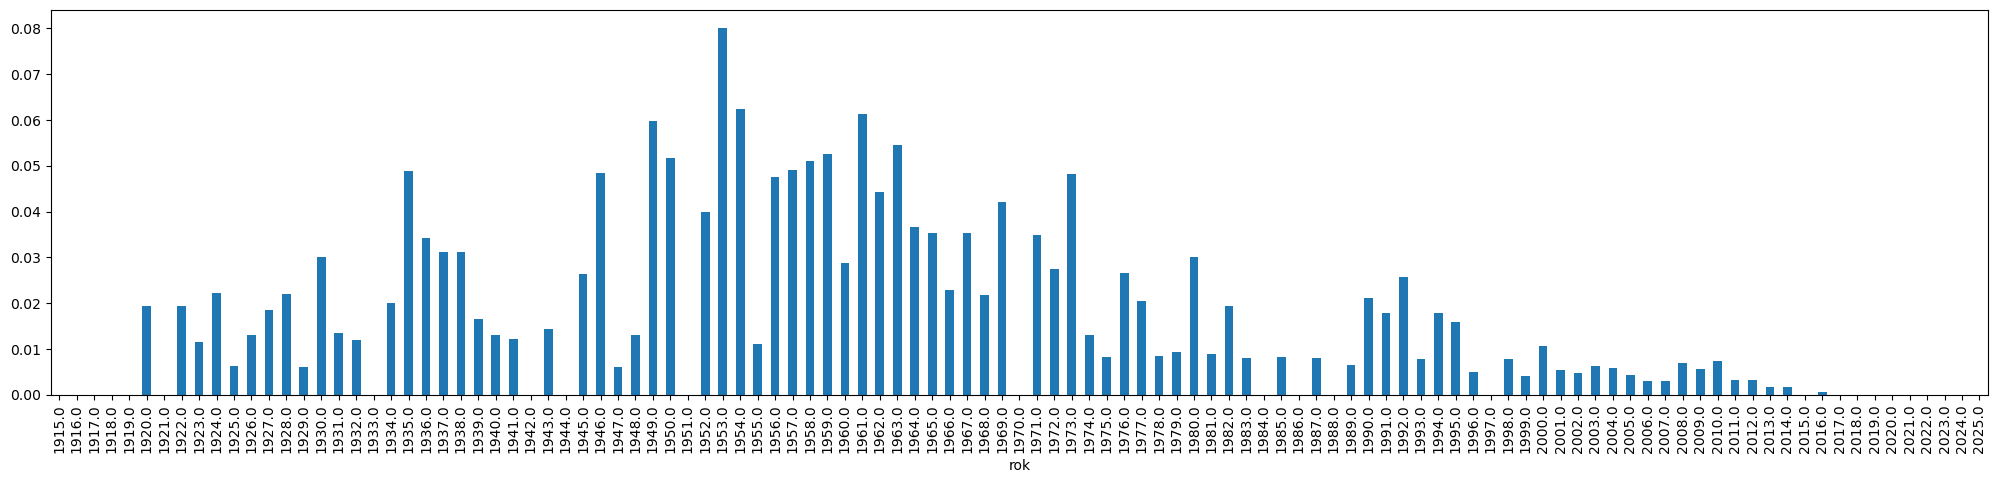

In [17]:
pd.Series(df[df['vezeni'].astype(str).str.contains('Terezín',na=False)].groupby('rok').size() / df.groupby('rok').size()).tail(111).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

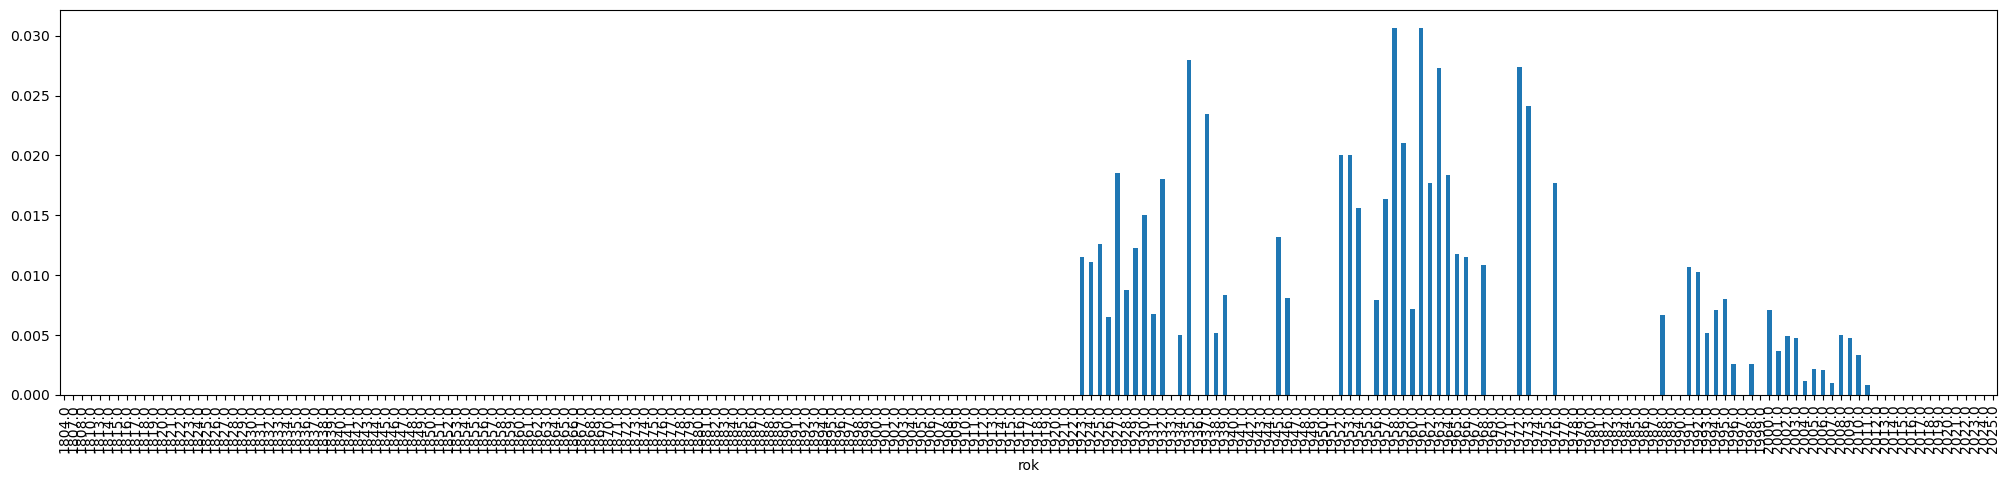

In [18]:
pd.Series(df[df['vezeni'].astype(str).str.contains('Koncentrační tábor Osvětim',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

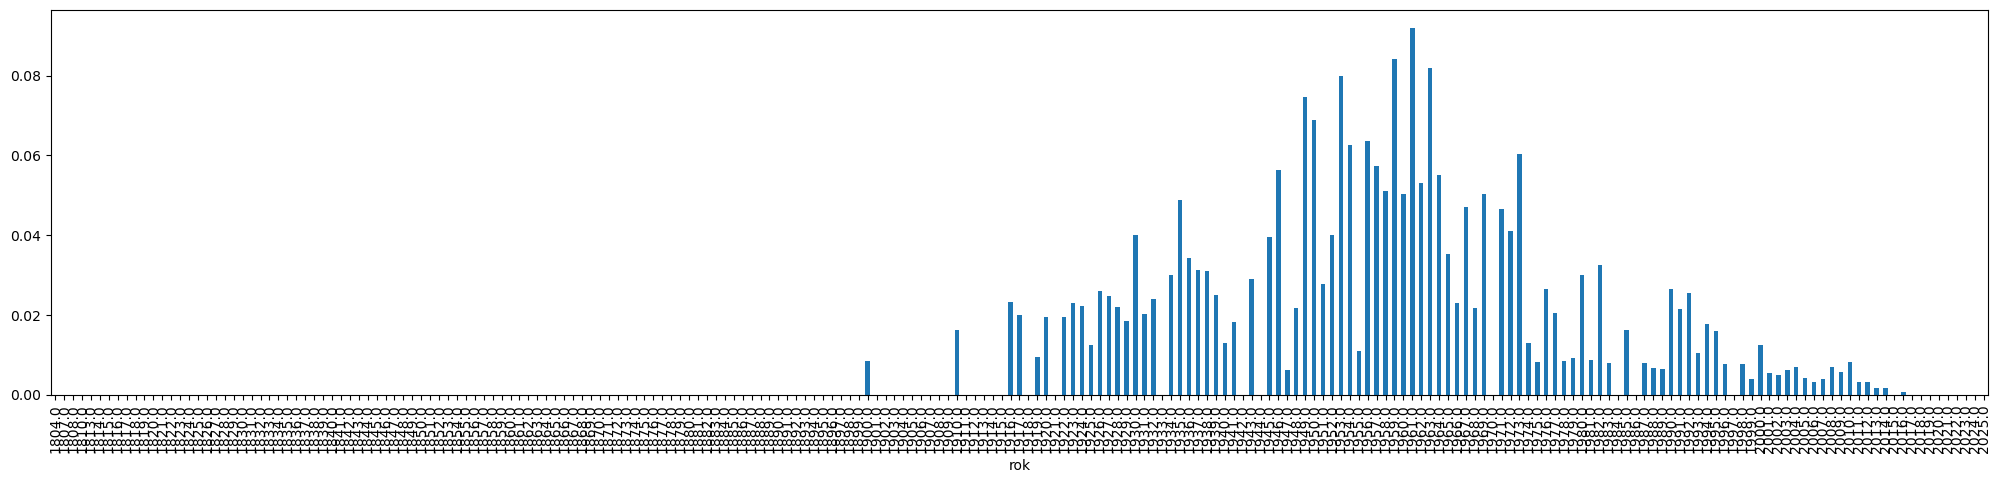

In [19]:
pd.Series(df[df['vezeni'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [20]:
kriminal = (df[df['vezeni'].notnull()].groupby('rok').size() / df.groupby('rok').size())
kriminal = kriminal[kriminal.index >= 1900]

In [21]:
strana = (df[df['strany'].astype(str).str.contains('Komunistická strana Československa',na=False)].groupby('rok').size() / df.groupby('rok').size())
strana = strana[strana.index >= 1900]

In [22]:
terezin = (df[df['vezeni'].astype(str).str.contains('Terezín',na=False)].groupby('rok').size() / df.groupby('rok').size())
terezin = terezin[terezin.index >= 1900]

In [23]:
instagram = (df[df['instagram'].notnull()].groupby('rok').size() / df.groupby('rok').size())
terezin = terezin[terezin.index >= 1900]

In [24]:
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [25]:
def irozhlas_conf():

    return {
        "config" : {
             "title": {'font': "Noticia Text",
                      'fontSize': 14,
                      'anchor': 'start',
                       'fontWeight': 'bolder',
                    'subtitleFont': 'Noticia Text',
                      'subtitleFontSize': 12,
                       'subtitleFontWeight': 'lighter',
                      'subtitlePadding': 12,
                       'dy': -12,
                      },
             "axis": {
                "labelFont": "Asap",
                "titleFont": "Asap",
                 "fontWeight": "lighter",
                "titleFontWeight": "lighter",
                "labelFontSize": 10,
                "titleFontSize": 10,
                'labelPadding': 2,
                 'titlePadding': 10
            },
            "legend": {
                "labelFont": "Asap",
                "labelFontWeight": "normal",
                "titleFont": "Asap",
                "titleFontWeight": "normal",
                "labelFontSize": 10,
                "titleFontSize": 10
            }
        }
    }

alt.themes.register('irozhlas', irozhlas_conf)
alt.themes.enable('irozhlas')

ThemeRegistry.enable('irozhlas')

In [26]:
titulek = "Ze kterých jazyků se kdy překládaly knihy do češtiny"
podtitulek = ["Podíl jazyků na překladové literatuře – krásné, naučné i odborné."] #,"Angličtina a francouzština (téměř) zmizely jen během 2. světové války,","kdy dominovaly překlady z němčiny. Po osvobození raketově narostl podíl ruštiny."]

In [27]:
from datetime import date

In [29]:
do_grafu = pd.concat([kriminal.reset_index().rename(columns={0:'vězení'}), strana.reset_index().rename(columns={0:'členství v KSČ'}), terezin.reset_index().rename(columns={0:'internaci v Terezíně'}), instagram.reset_index().rename(columns={0:'účet na Instagramu'})]).melt(id_vars="rok", value_vars=["členství v KSČ","vězení","internaci v Terezíně","účet na Instagramu"])
do_grafu['rok'] = do_grafu['rok'].astype(int)
do_grafu = do_grafu[do_grafu['rok'] >= 1900]
do_grafu['value'] = do_grafu['value'].fillna(0)
do_grafu['rok'] = do_grafu['rok'].apply(lambda x: date(year=x, month=1, day=1))
do_grafu['rok'] = pd.to_datetime(do_grafu['rok'])

In [31]:
str(do_grafu.sample(10))

'            rok              variable     value\n183  1957-01-01        členství v KSČ  0.098361\n759  1938-01-01                vězení  0.000000\n735  1914-01-01                vězení  0.000000\n155  1929-01-01        členství v KSČ  0.012270\n373  2021-01-01        členství v KSČ  0.000000\n536  1967-01-01        členství v KSČ  0.000000\n1315 2025-01-01  internaci v Terezíně  0.000000\n2327 1973-01-01    účet na Instagramu  0.000000\n1390 1974-01-01  internaci v Terezíně  0.000000\n1941 1930-01-01    účet na Instagramu  0.000000'

In [32]:
do_grafu.sort_values(by='rok').head(40)

,rok,variable,value
0,1900-01-01,členství v KSČ,0.000000
126,1900-01-01,členství v KSČ,0.008403
847,1900-01-01,vězení,0.000000
1659,1900-01-01,internaci v Terezíně,0.000000
595,1900-01-01,vězení,0.008403
721,1900-01-01,vězení,0.000000
2254,1900-01-01,účet na Instagramu,0.000000
1064,1900-01-01,vězení,0.000000
469,1900-01-01,členství v KSČ,0.000000
1316,1900-01-01,internaci v Terezíně,0.000000


In [33]:
do_grafu.sort_values(by='value',ascending=False)

,rok,variable,value
178,1952-01-01,členství v KSČ,0.340000
180,1954-01-01,členství v KSČ,0.265625
176,1950-01-01,členství v KSČ,0.224138
187,1961-01-01,členství v KSČ,0.214286
179,1953-01-01,členství v KSČ,0.200000
...,...,...,...
894,1947-01-01,vězení,0.000000
893,1946-01-01,vězení,0.000000
892,1945-01-01,vězení,0.000000
891,1944-01-01,vězení,0.000000


In [34]:
import polars as pl

In [35]:
alt.Chart(do_grafu, title={'text': titulek}, width=300).mark_line().encode(
    alt.X("rok:T"    ),
    alt.Y('value:Q'    ))

C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [36]:
podily_faceted = alt.Chart(do_grafu, title={'text': ["Co měli autoři a autorky beletrie za sebou nebo před sebou"]}, width=300).mark_bar(width=2).encode(
    alt.X("rok:T", 
          title=None,
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6')
    ),
    alt.Y('value:Q', 
          axis=alt.Axis(labelExpr="datum.label * 100 + ' %'", orient='right', domainOpacity=0, tickColor='#DCDDD6'), 
          title=None
    ),
    alt.Color("variable:N", 
              title=None, 
              legend=None,
              scale=alt.Scale(range=['#445B78','#5E2D3A', '#D6534B', '#9CA545','#E09DA3']),
              sort=['vězení','internaci v Terezíně','členství v KSČ','účet na Instagramu']
    ),
    row=alt.Row(
        "variable:N", 
        title=None, 
        spacing=15, 
        header=alt.Header(labelAngle=0, labelAlign='left', labelAnchor='middle', labelFont='Asap'), 
        sort=['vězení','internaci v Terezíně','členství v KSČ','účet na Instagramu']
    )
).resolve_scale(
    x='independent',
    y='independent'
).properties(height=100, width=300).configure_view(stroke='transparent')

podily_faceted

C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [37]:
do_grafu.sample(10)

,rok,variable,value
1480,1938-01-01,internaci v Terezíně,0.031088
152,1926-01-01,členství v KSČ,0.019481
2158,2021-01-01,účet na Instagramu,0.000000
138,1912-01-01,členství v KSČ,0.015873
2345,1991-01-01,účet na Instagramu,0.003571
1483,1941-01-01,internaci v Terezíně,0.012121
717,2022-01-01,vězení,0.000000
45,1945-01-01,členství v KSČ,0.000000
861,1914-01-01,vězení,0.000000
558,1989-01-01,členství v KSČ,0.000000


<Axes: xlabel='rok'>

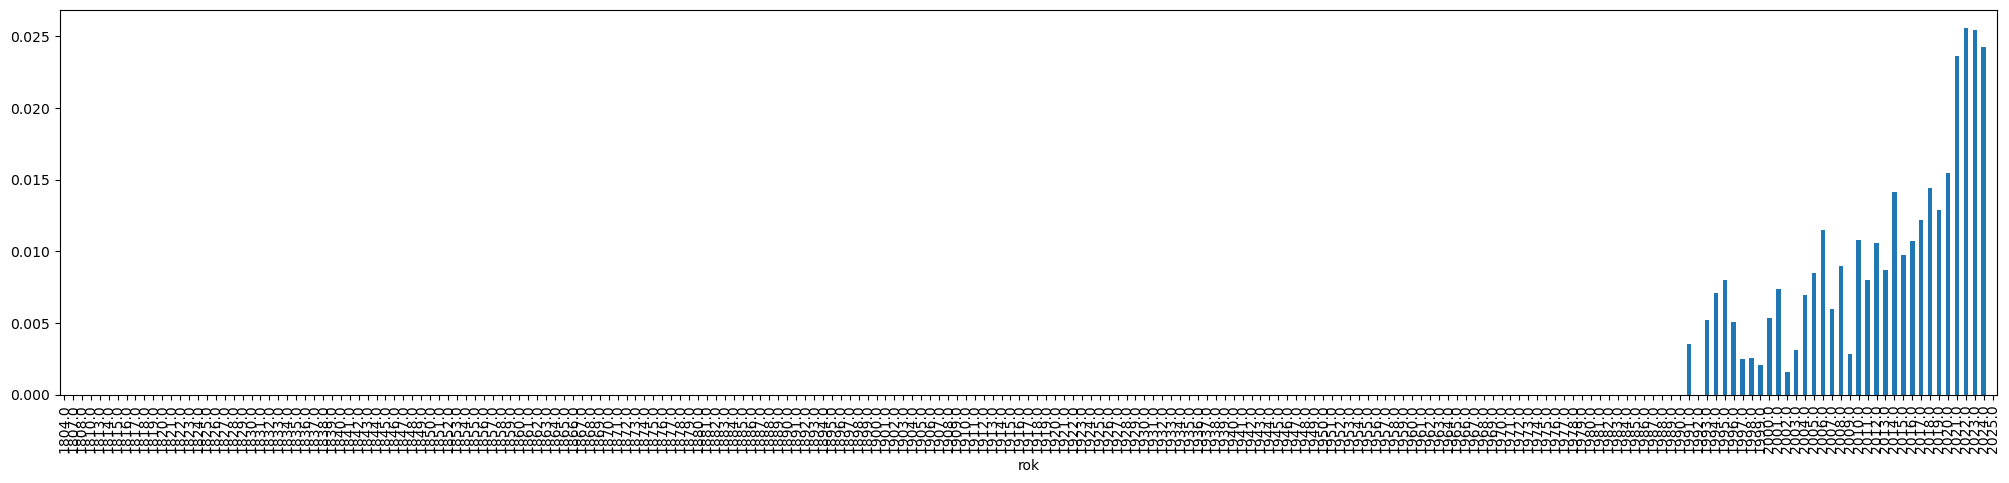

In [38]:
(df[df['instagram'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

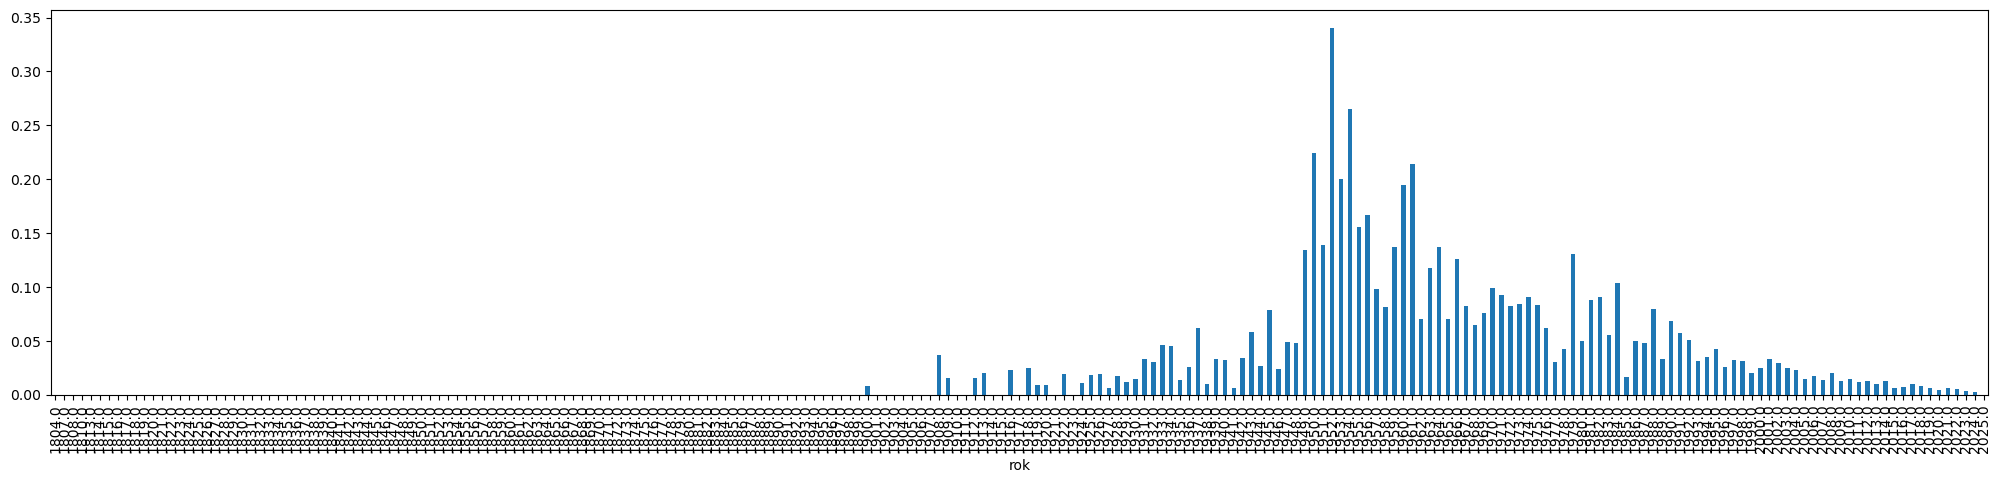

In [39]:
(df[df['strany'].astype(str).str.contains('Komunistická strana Československa',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

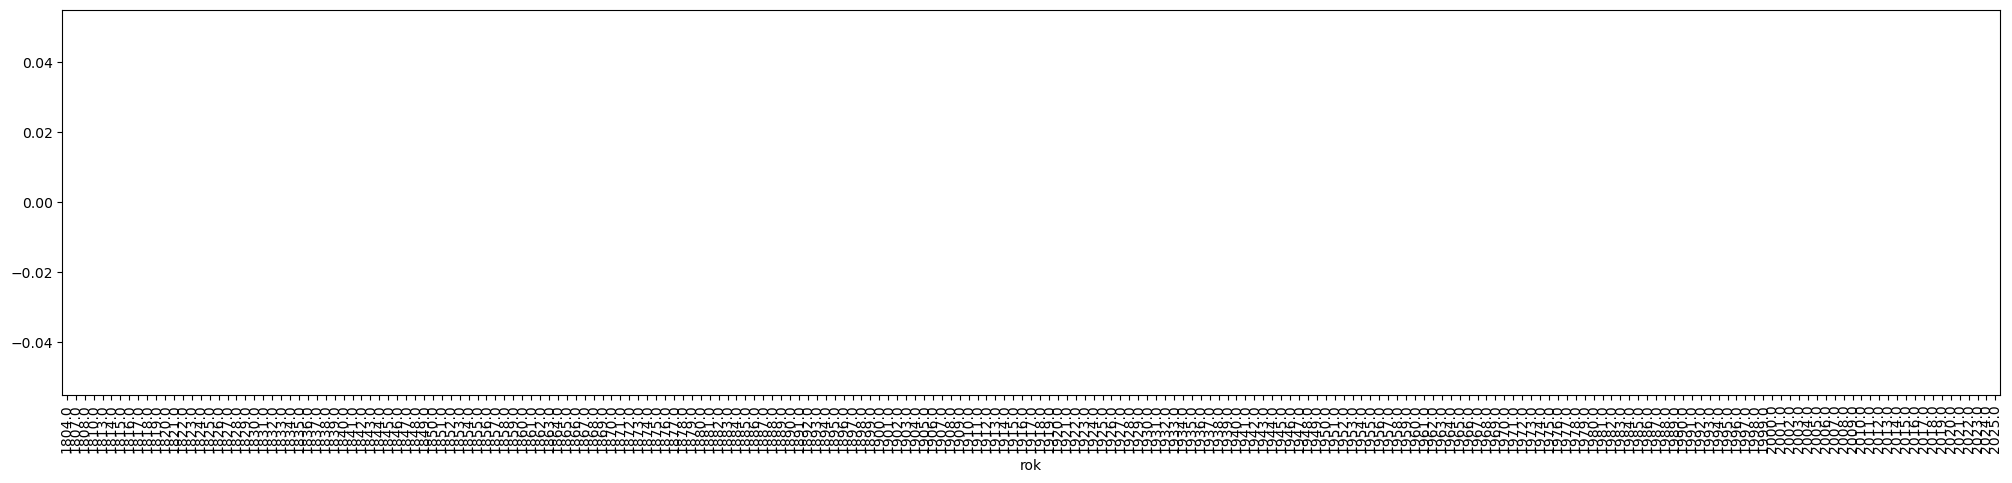

In [40]:
pd.Series(df[df['strany'].astype(str).str.contains('Q828099',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

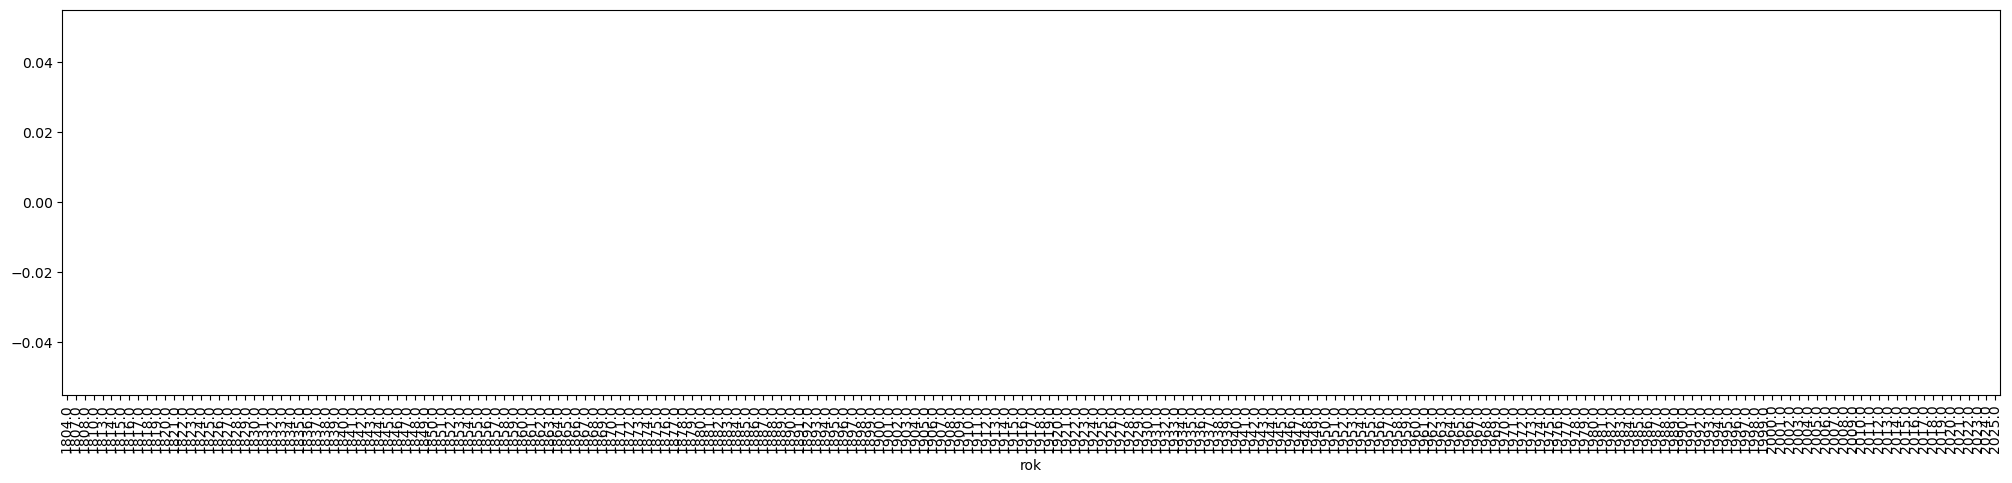

In [41]:
pd.Series(df[df['strany'].astype(str).str.contains('Q727724',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [42]:
df.explode('udalosti').groupby('udalosti').size().nlargest(10)

udalosti
svatba          127
ordinace        105
Transport Ek     74
Transport Cc     52
odvod branců     39
Transport L      36
emigrace         32
Transport Dh     18
Transport Di     14
rozvod           14
dtype: int64

<Axes: xlabel='rok'>

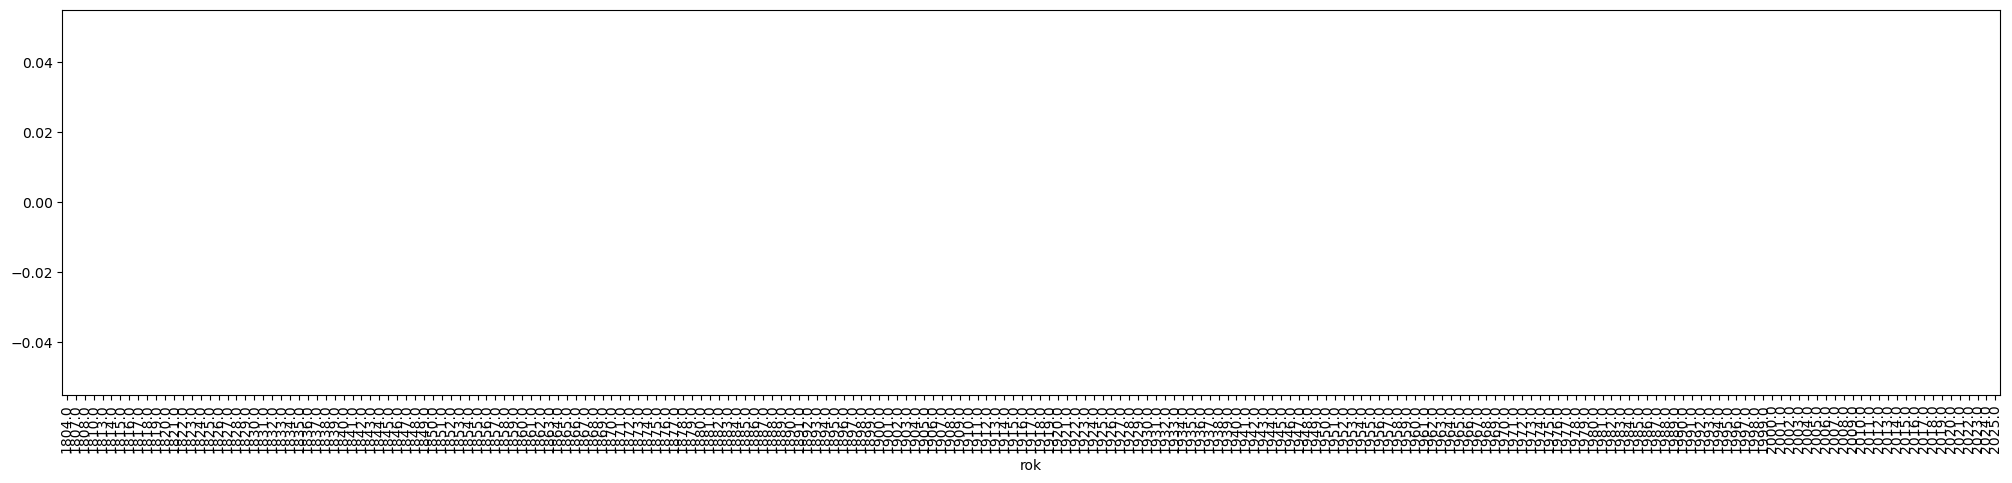

In [43]:
pd.Series(df[df['udalosti'].astype(str).str.contains('Q76358450',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [44]:
df.explode('druh_umrti').groupby('druh_umrti').size().nlargest(10)

druh_umrti
přirozená smrt             405
sebevražda                  65
trest smrti                 14
smrtelná nehoda             12
nepřirozená smrt             3
zabití člověka člověkem      1
dtype: int64

<Axes: xlabel='rok'>

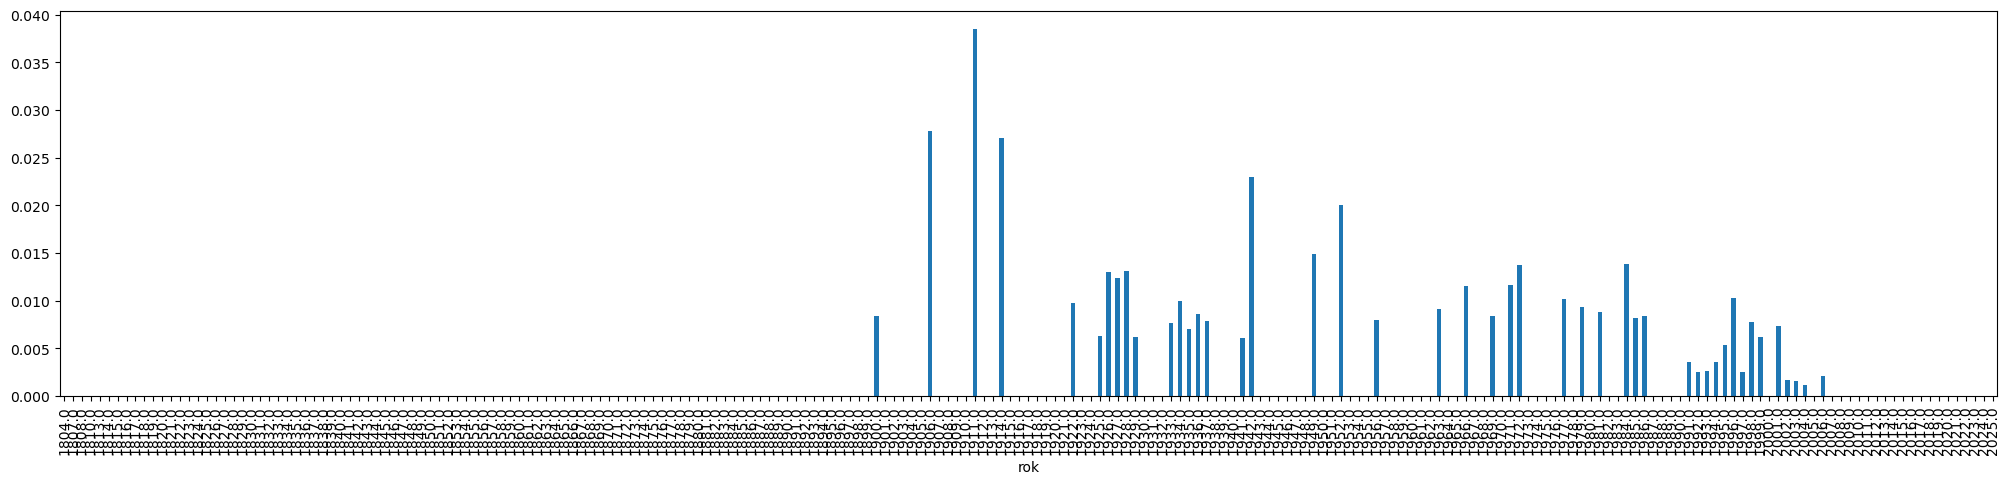

In [45]:
(df[df['druh_umrti'].astype(str).str.contains('sebevražda')].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

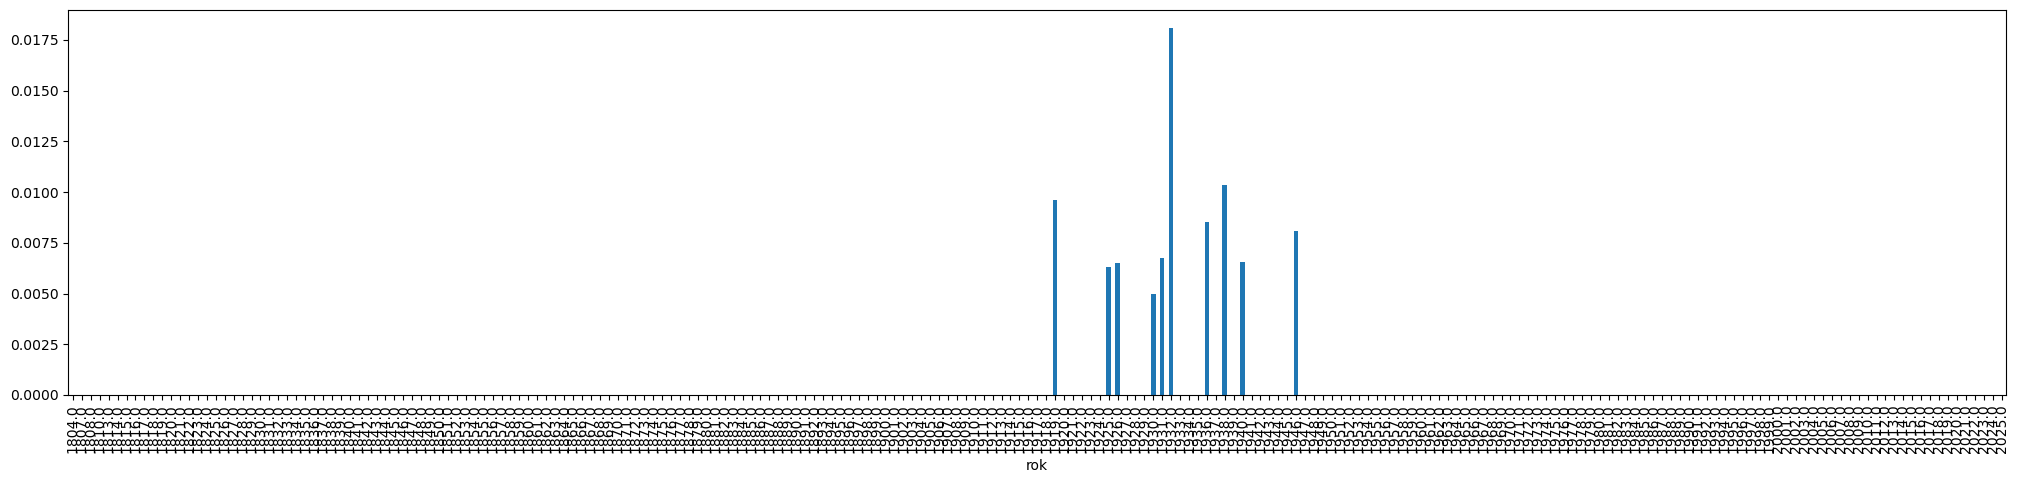

In [46]:
(df[df['druh_umrti'].astype(str).str.contains('trest smrti')].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

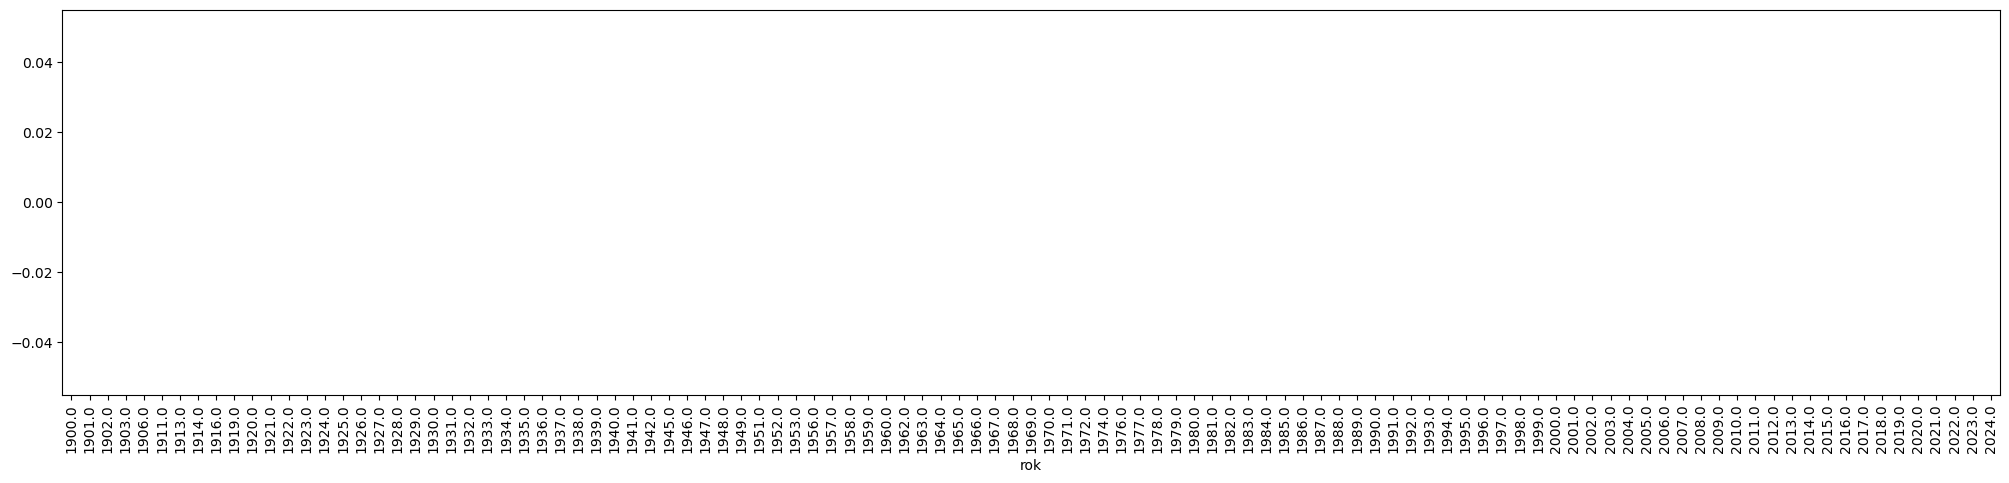

In [47]:
(df[df['druh_umrti'].astype(str).str.contains('Q10737')].groupby('rok').size() / df[df['druh_umrti'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))